In [2]:
import anndata
import os

# Load the .h5ad file (replace with your filename)
input_file = os.path.join('data', 'dataset.h5ad')
adata = anndata.read_h5ad(input_file)

# Basic info
print(adata)
print("Shape:", adata.shape)

# Show first few rows of observations and variables
print("Observations (obs):")
print(adata.obs.head())

print("Variables (var):")
print(adata.var.head())

# List available layers
print("Layers:", list(adata.layers.keys()))

# List obs and var columns
print("Obs columns:", adata.obs.columns.tolist())
print("Var columns:", adata.var.columns.tolist())

AnnData object with n_obs × n_vars = 3460 × 13565
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'
    var: 'feature_id', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'feature_name'
    uns: 'dataset_description', 'dataset_id', 'dataset_name', 'dataset_organism', 'dataset_reference', 'dataset_summary', 'dataset_url', 'normalization_id', 'spatial'
    obsm: 'spatial'
    layers: 'counts', 'normalized'
Shape: (3460, 13565)
Observations (obs):
                    in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4112   
AAACAATCTACTAGCA-1          1          3         43         

In [3]:
# read  the uns layer

print("Unstructured data (uns):")
print(adata.uns.keys())


Unstructured data (uns):
dict_keys(['dataset_description', 'dataset_id', 'dataset_name', 'dataset_organism', 'dataset_reference', 'dataset_summary', 'dataset_url', 'normalization_id', 'spatial'])


In [4]:
# make normalized df
normalized = adata.layers['normalized']
# Convert to DataFrame for easier manipulation
import pandas as pd
normalized_df = pd.DataFrame(normalized.toarray(), index=adata.obs_names, columns=adata.var_names)
normalized_df.head()

gene_ids            ENSG00000187634  ENSG00000188976  ENSG00000187961  \
AAACAAGTATCTCCCA-1         0.797556         0.000000              0.0   
AAACAATCTACTAGCA-1         0.376420         0.863387              0.0   
AAACACCAATAACTGC-1         0.000000         0.000000              0.0   
AAACAGAGCGACTCCT-1         0.000000         0.000000              0.0   
AAACAGCTTTCAGAAG-1         0.000000         0.000000              0.0   

gene_ids            ENSG00000187583  ENSG00000188290  ENSG00000187608  \
AAACAAGTATCTCCCA-1              0.0         0.000000         0.000000   
AAACAATCTACTAGCA-1              0.0         0.376420         0.000000   
AAACACCAATAACTGC-1              0.0         1.101823         1.101823   
AAACAGAGCGACTCCT-1              0.0         0.000000         0.000000   
AAACAGCTTTCAGAAG-1              0.0         0.689863         0.000000   

gene_ids            ENSG00000188157  ENSG00000131591  ENSG00000186891  \
AAACAAGTATCTCCCA-1         0.000000         0.000000              0.0   
AAACAATCTACTAGCA-1         0.000000         0.000000              0.0   
AAACACCAATAACTGC-1         0.000000         1.101823              0.0   
AAACAGAGCGACTCCT-1         0.000000         0.000000              0.0   
AAACAGCTTTCAGAAG-1         0.689863         0.000000              0.0   

gene_ids            ENSG00000186827  ...  ENSG00000155962  ENSG00000185973  \
AAACAAGTATCTCCCA-1              0.0  ...         0.000000         0.000000   
AAACAATCTACTAGCA-1              0.0  ...         0.376420         0.863387   
AAACACCAATAACTGC-1              0.0  ...         0.000000         0.000000   
AAACAGAGCGACTCCT-1              0.0  ...         0.000000         0.000000   
AAACAGCTTTCAGAAG-1              0.0  ...         0.689863         0.000000   

gene_ids            ENSG00000168939  ENSG00000124333  ENSG00000067646  \
AAACAAGTATCTCCCA-1              0.0         0.797556              0.0   
AAACAATCTACTAGCA-1              0.0         0.000000              0.0   
AAACACCAATAACTGC-1              0.0         1.101823              0.0   
AAACAGAGCGACTCCT-1              0.0         0.000000              0.0   
AAACAGCTTTCAGAAG-1              0.0         0.000000              0.0   

gene_ids            ENSG00000092377  ENSG00000114374  ENSG00000067048  \
AAACAAGTATCTCCCA-1          0.00000              0.0         0.797556   
AAACAATCTACTAGCA-1          0.37642              0.0         0.863387   
AAACACCAATAACTGC-1          0.00000              0.0         0.000000   
AAACAGAGCGACTCCT-1          0.00000              0.0         1.524446   
AAACAGCTTTCAGAAG-1          0.00000              0.0         0.000000   

gene_ids            ENSG00000154620  ENSG00000012817  
AAACAAGTATCTCCCA-1              0.0         0.000000  
AAACAATCTACTAGCA-1              0.0         1.189457  
AAACACCAATAACTGC-1              0.0         1.950036  
AAACAGAGCGACTCCT-1              0.0         1.028297  
AAACAGCTTTCAGAAG-1              0.0         0.689863  

[5 rows x 13565 columns]

In [5]:
# sum of first 10 rows
print("Sum of first 10 rows in normalized data:")
print(normalized_df.head(10).sum(axis=1))

# sum of first 10 columns
print("Sum of first 10 columns in normalized data:")
print(normalized_df.iloc[:, :10].sum(axis=0))

Sum of first 10 rows in normalized data:
AAACAAGTATCTCCCA-1    4378.857910
AAACAATCTACTAGCA-1    5067.544922
AAACACCAATAACTGC-1    3909.870361
AAACAGAGCGACTCCT-1    3960.922119
AAACAGCTTTCAGAAG-1    4802.030762
AAACAGGGTCTATATT-1    4851.807617
AAACATGGTGAGAGGA-1    3212.854980
AAACCACTACACAGAT-1    4547.059570
AAACCCGAACGAAATC-1    4564.635742
AAACCGGAAATGTTAA-1    3360.305664
dtype: float32
Sum of first 10 columns in normalized data:
gene_ids
ENSG00000187634     661.479065
ENSG00000188976    1152.149292
ENSG00000187961     101.576706
ENSG00000187583      79.440659
ENSG00000188290    1753.913452
ENSG00000187608     473.044189
ENSG00000188157     934.874878
ENSG00000131591     292.706940
ENSG00000186891      37.262123
ENSG00000186827     393.709473
dtype: float32


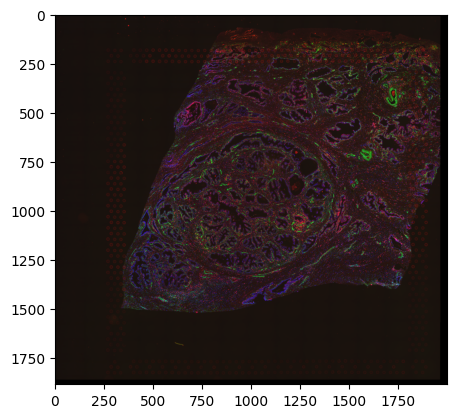

In [6]:
import matplotlib.pyplot as plt

matrices = adata.uns['spatial']['Visium_FFPE_Human_Prostate_IF']['images']['hires']


plt.imshow(matrices)
plt.show()

In [7]:
# show counts layer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


counts = adata.layers['counts']

# Convert counts to a DataFrame for easier manipulation
counts_df = pd.DataFrame(counts.toarray(), index=adata.obs_names, columns=adata.var_names)
# Display the first few rows of the counts DataFrame
print("Counts DataFrame:")
counts_df.head()

Counts DataFrame:


gene_ids            ENSG00000187634  ENSG00000188976  ENSG00000187961  \
AAACAAGTATCTCCCA-1              1.0              0.0              0.0   
AAACAATCTACTAGCA-1              1.0              3.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   

gene_ids            ENSG00000187583  ENSG00000188290  ENSG00000187608  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              1.0              0.0   
AAACACCAATAACTGC-1              0.0              1.0              1.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              1.0              0.0   

gene_ids            ENSG00000188157  ENSG00000131591  ENSG00000186891  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              1.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              1.0              0.0              0.0   

gene_ids            ENSG00000186827  ...  ENSG00000155962  ENSG00000185973  \
AAACAAGTATCTCCCA-1              0.0  ...              0.0              0.0   
AAACAATCTACTAGCA-1              0.0  ...              1.0              3.0   
AAACACCAATAACTGC-1              0.0  ...              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0  ...              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0  ...              1.0              0.0   

gene_ids            ENSG00000168939  ENSG00000124333  ENSG00000067646  \
AAACAAGTATCTCCCA-1              0.0              1.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              1.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   

gene_ids            ENSG00000092377  ENSG00000114374  ENSG00000067048  \
AAACAAGTATCTCCCA-1              0.0              0.0              1.0   
AAACAATCTACTAGCA-1              1.0              0.0              3.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              2.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   

gene_ids            ENSG00000154620  ENSG00000012817  
AAACAAGTATCTCCCA-1              0.0              0.0  
AAACAATCTACTAGCA-1              0.0              5.0  
AAACACCAATAACTGC-1              0.0              3.0  
AAACAGAGCGACTCCT-1              0.0              1.0  
AAACAGCTTTCAGAAG-1              0.0              1.0  

[5 rows x 13565 columns]

In [8]:
counts_df.columns

Index(['ENSG00000187634', 'ENSG00000188976', 'ENSG00000187961',
       'ENSG00000187583', 'ENSG00000188290', 'ENSG00000187608',
       'ENSG00000188157', 'ENSG00000131591', 'ENSG00000186891',
       'ENSG00000186827',
       ...
       'ENSG00000155962', 'ENSG00000185973', 'ENSG00000168939',
       'ENSG00000124333', 'ENSG00000067646', 'ENSG00000092377',
       'ENSG00000114374', 'ENSG00000067048', 'ENSG00000154620',
       'ENSG00000012817'],
      dtype='object', name='gene_ids', length=13565)

In [9]:
# convert observations to a DataFrame
obs_df = adata.obs.copy()

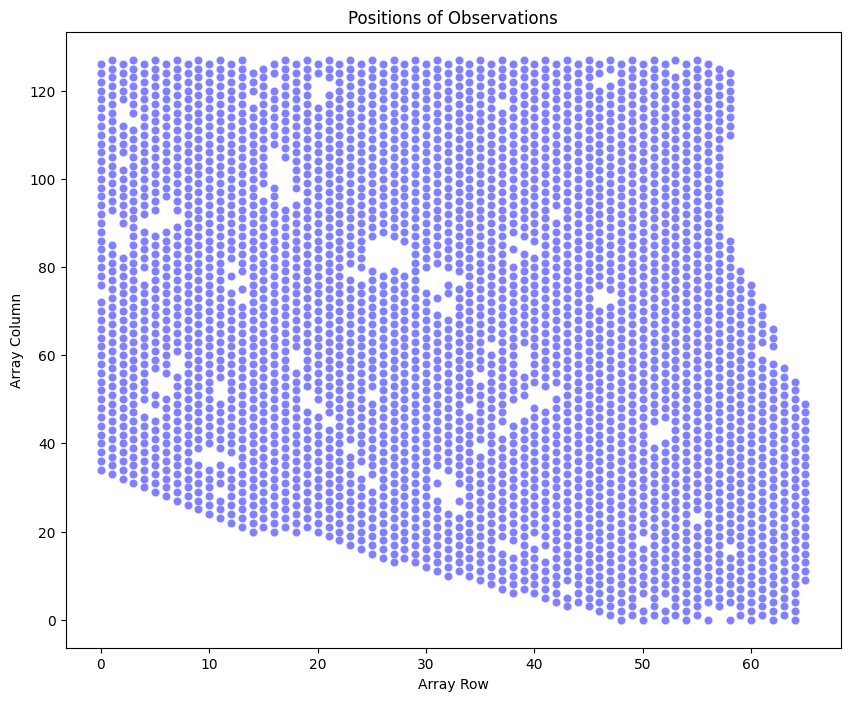

In [10]:
# plot positions of the experssions in observations using array_row and array_col in obs_df
plt.figure(figsize=(10, 8))
sns.scatterplot(data=obs_df, x='array_row', y='array_col', color='blue', alpha=0.5)
plt.title('Positions of Observations')
plt.xlabel('Array Row')
plt.ylabel('Array Column')
plt.show()


In [11]:
#Join the counts_df with obs_df
joined_df = obs_df.join(counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined DataFrame:")
joined_df.head()

Joined DataFrame:


in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4112   
AAACAATCTACTAGCA-1          1          3         43               7063   
AAACACCAATAACTGC-1          1         59         19               2961   
AAACAGAGCGACTCCT-1          1         14         94               3110   
AAACAGCTTTCAGAAG-1          1         43          9               5010   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.321908        8211.0            9.013351   
AAACAATCTACTAGCA-1                 8.862767       21905.0            9.994515   
AAACACCAATAACTGC-1                 7.993620        4987.0            8.514791   
AAACAGAGCGACTCCT-1                 8.042699        5575.0            8.626227   
AAACAGCTTTCAGAAG-1                 8.519391       10090.0            9.219399   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   14.845938                    20.557788   
AAACAATCTACTAGCA-1                   13.558548                    18.237845   
AAACACCAATAACTGC-1                   15.299779                    21.195107   
AAACAGAGCGACTCCT-1                   15.838565                    21.739910   
AAACAGCTTTCAGAAG-1                   11.585728                    16.253717   

                    pct_counts_in_top_200_genes  ...  ENSG00000155962  \
AAACAAGTATCTCCCA-1                    27.950311  ...              0.0   
AAACAATCTACTAGCA-1                    24.807122  ...              1.0   
AAACACCAATAACTGC-1                    29.256066  ...              0.0   
AAACAGAGCGACTCCT-1                    29.524664  ...              0.0   
AAACAGCTTTCAGAAG-1                    22.983152  ...              1.0   

                    ENSG00000185973  ENSG00000168939  ENSG00000124333  \
AAACAAGTATCTCCCA-1              0.0              0.0              1.0   
AAACAATCTACTAGCA-1              3.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              1.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   

                    ENSG00000067646  ENSG00000092377  ENSG00000114374  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              1.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   

                    ENSG00000067048  ENSG00000154620  ENSG00000012817  
AAACAAGTATCTCCCA-1              1.0              0.0              0.0  
AAACAATCTACTAGCA-1              3.0              0.0              5.0  
AAACACCAATAACTGC-1              0.0              0.0              3.0  
AAACAGAGCGACTCCT-1              2.0              0.0              1.0  
AAACAGCTTTCAGAAG-1              0.0              0.0              1.0  

[5 rows x 13578 columns]

In [12]:
# create data frame from the counts_df where the value is the column name of the highest value in teh row
max_counts_df = counts_df.idxmax(axis=1)
# Display the first few rows of the max_counts DataFrame
print("Max Counts DataFrame:")
type(max_counts_df)
#convert to a DataFrame
max_counts_df = pd.DataFrame(max_counts_df, columns=['max_gene'])
max_counts_df.head()

Max Counts DataFrame:


max_gene
AAACAAGTATCTCCCA-1  ENSG00000150991
AAACAATCTACTAGCA-1  ENSG00000142515
AAACACCAATAACTGC-1  ENSG00000107317
AAACAGAGCGACTCCT-1  ENSG00000107796
AAACAGCTTTCAGAAG-1  ENSG00000150991

In [13]:
#join the max_counts_df with obs_df
joined_max_counts_df = obs_df.join(max_counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined Max Counts DataFrame:")
joined_max_counts_df.head()

Joined Max Counts DataFrame:


in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4112   
AAACAATCTACTAGCA-1          1          3         43               7063   
AAACACCAATAACTGC-1          1         59         19               2961   
AAACAGAGCGACTCCT-1          1         14         94               3110   
AAACAGCTTTCAGAAG-1          1         43          9               5010   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.321908        8211.0            9.013351   
AAACAATCTACTAGCA-1                 8.862767       21905.0            9.994515   
AAACACCAATAACTGC-1                 7.993620        4987.0            8.514791   
AAACAGAGCGACTCCT-1                 8.042699        5575.0            8.626227   
AAACAGCTTTCAGAAG-1                 8.519391       10090.0            9.219399   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   14.845938                    20.557788   
AAACAATCTACTAGCA-1                   13.558548                    18.237845   
AAACACCAATAACTGC-1                   15.299779                    21.195107   
AAACAGAGCGACTCCT-1                   15.838565                    21.739910   
AAACAGCTTTCAGAAG-1                   11.585728                    16.253717   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    27.950311                    41.480940   
AAACAATCTACTAGCA-1                    24.807122                    36.986989   
AAACACCAATAACTGC-1                    29.256066                    44.114698   
AAACAGAGCGACTCCT-1                    29.524664                    44.430493   
AAACAGCTTTCAGAAG-1                    22.983152                    36.283449   

                    n_genes  size_factors         max_gene  
AAACAAGTATCTCCCA-1     4112        8196.0  ENSG00000150991  
AAACAATCTACTAGCA-1     7063       21879.0  ENSG00000142515  
AAACACCAATAACTGC-1     2961        4976.0  ENSG00000107317  
AAACAGAGCGACTCCT-1     3110        5567.0  ENSG00000107796  
AAACAGCTTTCAGAAG-1     5010       10066.0  ENSG00000150991

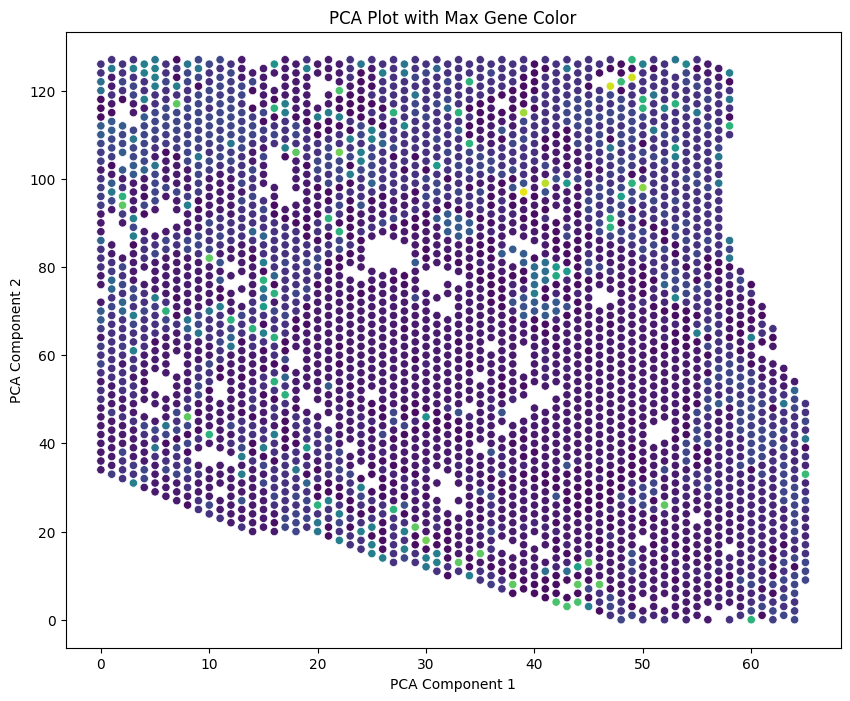

In [14]:
# plot chart with x as array_row, y as array_col and color as max_gene
plt.figure(figsize=(10, 8))
sns.scatterplot(data=joined_max_counts_df, x='array_row', y='array_col', hue='max_gene', palette='viridis', legend=None)
plt.title('PCA Plot with Max Gene Color')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

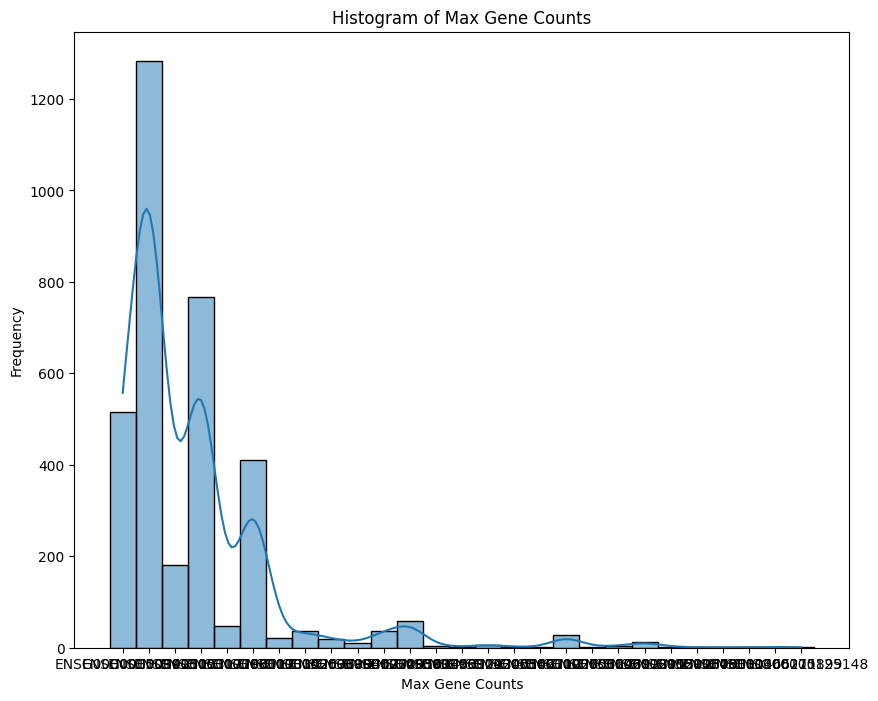

In [15]:
# histogram of the max gene counts
plt.figure(figsize=(10, 8))
sns.histplot(data=joined_max_counts_df, x='max_gene', bins=30, kde=True)
plt.title('Histogram of Max Gene Counts')
plt.xlabel('Max Gene Counts')
plt.ylabel('Frequency')
plt.show()


In [16]:
# find the top 10 genes with the highest counts
top_genes = counts_df.sum(axis=0).nlargest(10)
# Display the top 10 genes
print("Top 10 Genes with Highest Counts:")
print(top_genes)

Top 10 Genes with Highest Counts:
gene_ids
ENSG00000142515    467281.0
ENSG00000014257    298088.0
ENSG00000150991    267157.0
ENSG00000107796    193015.0
ENSG00000101335    187140.0
ENSG00000167751    183211.0
ENSG00000075624    172753.0
ENSG00000263639    148996.0
ENSG00000149591    141297.0
ENSG00000205542    136050.0
dtype: float32


In [17]:
# find the names of the top 10 genes
top_genes_names = top_genes.index.tolist()
# Display the names of the top 10 genes
print("Top 10 Genes Names:")
print(top_genes_names)

Top 10 Genes Names:
['ENSG00000142515', 'ENSG00000014257', 'ENSG00000150991', 'ENSG00000107796', 'ENSG00000101335', 'ENSG00000167751', 'ENSG00000075624', 'ENSG00000263639', 'ENSG00000149591', 'ENSG00000205542']


In [18]:
# make a big df of all the data
all_data_df = joined_df.copy()

# drop columns n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,size_factors
all_data_df.drop(columns=['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
                        'log1p_total_counts', 'pct_counts_in_top_50_genes',
                        'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
                        'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'], inplace=True)

all_data_df.head()

in_tissue  array_row  array_col  ENSG00000187634  \
AAACAAGTATCTCCCA-1          1         50        102              1.0   
AAACAATCTACTAGCA-1          1          3         43              1.0   
AAACACCAATAACTGC-1          1         59         19              0.0   
AAACAGAGCGACTCCT-1          1         14         94              0.0   
AAACAGCTTTCAGAAG-1          1         43          9              0.0   

                    ENSG00000188976  ENSG00000187961  ENSG00000187583  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              3.0              0.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   

                    ENSG00000188290  ENSG00000187608  ENSG00000188157  ...  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0  ...   
AAACAATCTACTAGCA-1              1.0              0.0              0.0  ...   
AAACACCAATAACTGC-1              1.0              1.0              0.0  ...   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0  ...   
AAACAGCTTTCAGAAG-1              1.0              0.0              1.0  ...   

                    ENSG00000155962  ENSG00000185973  ENSG00000168939  \
AAACAAGTATCTCCCA-1              0.0              0.0              0.0   
AAACAATCTACTAGCA-1              1.0              3.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              1.0              0.0              0.0   

                    ENSG00000124333  ENSG00000067646  ENSG00000092377  \
AAACAAGTATCTCCCA-1              1.0              0.0              0.0   
AAACAATCTACTAGCA-1              0.0              0.0              1.0   
AAACACCAATAACTGC-1              1.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              0.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   

                    ENSG00000114374  ENSG00000067048  ENSG00000154620  \
AAACAAGTATCTCCCA-1              0.0              1.0              0.0   
AAACAATCTACTAGCA-1              0.0              3.0              0.0   
AAACACCAATAACTGC-1              0.0              0.0              0.0   
AAACAGAGCGACTCCT-1              0.0              2.0              0.0   
AAACAGCTTTCAGAAG-1              0.0              0.0              0.0   

                    ENSG00000012817  
AAACAAGTATCTCCCA-1              0.0  
AAACAATCTACTAGCA-1              5.0  
AAACACCAATAACTGC-1              3.0  
AAACAGAGCGACTCCT-1              1.0  
AAACAGCTTTCAGAAG-1              1.0  

[5 rows x 13568 columns]

In [19]:
transformed_data_df = all_data_df.copy().drop(columns=["in_tissue"])

# create mapping of gene names to a z coordinate
gene_z_mapping = {gene: idx for idx, gene in enumerate(counts_df.columns)}

# create new df where each count is in its own cell with columns: array_row, array_col, gene, count
melted_df = transformed_data_df.melt(id_vars=['array_row', 'array_col'],
                                       var_name='gene', value_name='count')
#display the first few rows of the melted DataFrame
melted_df.head()

array_row  array_col             gene  count
0         50        102  ENSG00000187634    1.0
1          3         43  ENSG00000187634    1.0
2         59         19  ENSG00000187634    0.0
3         14         94  ENSG00000187634    0.0
4         43          9  ENSG00000187634    0.0

In [20]:
gene_z_mapping

{'ENSG00000187634': 0,
 'ENSG00000188976': 1,
 'ENSG00000187961': 2,
 'ENSG00000187583': 3,
 'ENSG00000188290': 4,
 'ENSG00000187608': 5,
 'ENSG00000188157': 6,
 'ENSG00000131591': 7,
 'ENSG00000186891': 8,
 'ENSG00000186827': 9,
 'ENSG00000078808': 10,
 'ENSG00000176022': 11,
 'ENSG00000160087': 12,
 'ENSG00000162572': 13,
 'ENSG00000131584': 14,
 'ENSG00000169972': 15,
 'ENSG00000127054': 16,
 'ENSG00000224051': 17,
 'ENSG00000107404': 18,
 'ENSG00000162576': 19,
 'ENSG00000175756': 20,
 'ENSG00000221978': 21,
 'ENSG00000235098': 22,
 'ENSG00000179403': 23,
 'ENSG00000215915': 24,
 'ENSG00000205090': 25,
 'ENSG00000160075': 26,
 'ENSG00000197530': 27,
 'ENSG00000189409': 28,
 'ENSG00000248333': 29,
 'ENSG00000189339': 30,
 'ENSG00000215790': 31,
 'ENSG00000008130': 32,
 'ENSG00000078369': 33,
 'ENSG00000169885': 34,
 'ENSG00000178821': 35,
 'ENSG00000067606': 36,
 'ENSG00000162585': 37,
 'ENSG00000157933': 38,
 'ENSG00000116151': 39,
 'ENSG00000157916': 40,
 'ENSG00000157911': 41,
 '

In [21]:
#map the gene names to z coordinates
melted_df['z'] = melted_df['gene'].map(gene_z_mapping)
# Display the first few rows of the melted DataFrame with z coordinates
melted_df.head()
len(melted_df['z'])

46934900

In [22]:
# plot 3d scatter plot of the data only for counts greater than 0
import plotly.graph_objects as go
import plotly.express as px

# grab some random poitnts to visualize
import random

# Filter the melted DataFrame for counts greater than 0
filtered_melted_df = melted_df[melted_df['count'] > 2]

# Randomly sample 100000 points for visualization but keep the points where gene = ENSG00000142515
filtered_melted_df = pd.concat([(filtered_melted_df[filtered_melted_df['gene'] == 'ENSG00000142515']),
    filtered_melted_df[filtered_melted_df['gene'] != 'ENSG00000142515'].sample(n=min(10000, len(filtered_melted_df)), random_state=42)])

# sampled_indices = random.sample(range(len(filtered_melted_df)), min(100000, len(filtered_melted_df)))
# filtered_melted_df = filtered_melted_df.iloc[sampled_indices]

# add number id to the DataFrame with count of 1 as id 1, 2-5 as id 2, 6-40 as id 3,  40+ as id 4
filtered_melted_df['id'] = pd.cut(filtered_melted_df['count'],
                                  bins=[0, 1, 5, 40, float('inf')],
                                  labels=[4, 3, 2, 1],
                                  right=False)


# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=filtered_melted_df['array_row'],
    y=filtered_melted_df['array_col'],
    z=filtered_melted_df['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=filtered_melted_df['id'],  # Color by count
        opacity=0.8
    ),
    text=filtered_melted_df['count']  # Hover text
)])
fig.update_layout(
    title='3D Scatter Plot of Gene Counts',
    scene=dict(
        xaxis_title='Array Row',
        yaxis_title='Array Column',
        zaxis_title='Gene (Z Coordinate)'
    ),
    width=800,
    height=800
)
fig.show()


In [23]:
# plot 3d scatter plot of the data only for counts greater than 0
import plotly.graph_objects as go
import plotly.express as px

# grab some random poitnts to visualize
import random

# Filter the melted DataFrame for counts greater than 0
filtered_melted_df = melted_df[melted_df['count'] > 0]

# Randomly sample 10 layers (z coordinates) for visualization
sampled_z = random.sample(list(filtered_melted_df['z'].unique()), min(50, len(filtered_melted_df['z'].unique())))
filtered_melted_df = filtered_melted_df[filtered_melted_df['z'].isin(sampled_z)]


# add number id to the DataFrame with count of 1 as id 1, 2-5 as id 2, 6-40 as id 3,  40+ as id 4
filtered_melted_df['id'] = pd.cut(filtered_melted_df['count'],
                                  bins=[0, 1, 5, 40, float('inf')],
                                  labels=[4, 3, 2, 1],
                                  right=False)

# add new column for marker with form count, gene
filtered_melted_df['marker'] = filtered_melted_df['count'].astype(str) + ', ' + filtered_melted_df['gene']


# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=filtered_melted_df['array_row'],
    y=filtered_melted_df['array_col'],
    z=filtered_melted_df['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=filtered_melted_df['id'],  # Color by count
        opacity=0.8
    ),
    text= (filtered_melted_df['marker'])  # Hover text
)])
fig.update_layout(
    title='3D Scatter Plot of Gene Counts',
    scene=dict(
        xaxis_title='Array Row',
        yaxis_title='Array Column',
        zaxis_title='Gene (Z Coordinate)'
    ),
    width=800,
    height=800
)
fig.show()


In [24]:
# find different numbers in counts
unique_counts = filtered_melted_df['count'].unique()
len(unique_counts)

44

In [ ]:
# work with all_data_df
# change index name to 'id'
all_data_df.reset_index(inplace=True)
all_data_df.rename(columns={'index': 'id'}, inplace=True)

In [27]:
# set index to id, in_tissue, array_row, array_col
all_data_df.set_index(['id', 'in_tissue', 'array_row', 'array_col'], inplace=True)
all_data_df

ENSG00000187634  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    1.0   
AAACAATCTACTAGCA-1 1         3         43                     1.0   
AAACACCAATAACTGC-1 1         59        19                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9                      0.0   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                     0.0   
TTGTTTCACATCCAGG-1 1         58        42                     0.0   
TTGTTTCATTAGTCTA-1 1         60        30                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   
TTGTTTGTGTAAATTC-1 1         7         51                     0.0   

                                                  ENSG00000188976  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     3.0   
AAACACCAATAACTGC-1 1         59        19                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9                      0.0   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                     1.0   
TTGTTTCACATCCAGG-1 1         58        42                     1.0   
TTGTTTCATTAGTCTA-1 1         60        30                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   
TTGTTTGTGTAAATTC-1 1         7         51                     2.0   

                                                  ENSG00000187961  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACACCAATAACTGC-1 1         59        19                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9                      0.0   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                     0.0   
TTGTTTCACATCCAGG-1 1         58        42                     0.0   
TTGTTTCATTAGTCTA-1 1         60        30                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   
TTGTTTGTGTAAATTC-1 1         7         51                     0.0   

                                                  ENSG00000187583  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     0.0   
AAACACCAATAACTGC-1 1         59        19                     0.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9                      0.0   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                     0.0   
TTGTTTCACATCCAGG-1 1         58        42                     0.0   
TTGTTTCATTAGTCTA-1 1         60        30                     0.0   
TTGTTTCCATACAACT-1 1         45        27                     0.0   
TTGTTTGTGTAAATTC-1 1         7         51                     0.0   

                                                  ENSG00000188290  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    0.0   
AAACAATCTACTAGCA-1 1         3         43                     1.0   
AAACACCAATAACTGC-1 1         59        19                     1.0   
AAACAGAGCGACTCCT-1 1         14        94                     0.0   
AAACAGCTTTCAGAAG-1 1         43        9    

In [28]:
# find top 100 genes with greatest variance
top_variance_genes = all_data_df.var().nlargest(100)
# Display the top 100 genes with greatest variance
print("Top 100 Genes with Greatest Variance:")
print(top_variance_genes)

Top 100 Genes with Greatest Variance:
ENSG00000142515    29731.062500
ENSG00000014257    13386.681641
ENSG00000263639     4779.111816
ENSG00000167751     4421.514648
ENSG00000150991     1247.133911
                       ...     
ENSG00000108518       43.354572
ENSG00000113140       43.348610
ENSG00000135404       42.968292
ENSG00000105373       41.387997
ENSG00000086598       41.134514
Length: 100, dtype: float32


In [ ]:
# create a new DataFrame with only the top 100 genes
top_variance_genes_df = all_data_df[top_variance_genes.index]
# Display the first few rows of the top variance genes DataFrame
top_variance_genes_df

ENSG00000142515  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    7.0   
AAACAATCTACTAGCA-1 1         3         43                   384.0   
AAACACCAATAACTGC-1 1         59        19                    42.0   
AAACAGAGCGACTCCT-1 1         14        94                    26.0   
AAACAGCTTTCAGAAG-1 1         43        9                     29.0   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                   576.0   
TTGTTTCACATCCAGG-1 1         58        42                    17.0   
TTGTTTCATTAGTCTA-1 1         60        30                    11.0   
TTGTTTCCATACAACT-1 1         45        27                    62.0   
TTGTTTGTGTAAATTC-1 1         7         51                   144.0   

                                                  ENSG00000014257  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    4.0   
AAACAATCTACTAGCA-1 1         3         43                   141.0   
AAACACCAATAACTGC-1 1         59        19                    25.0   
AAACAGAGCGACTCCT-1 1         14        94                    14.0   
AAACAGCTTTCAGAAG-1 1         43        9                     14.0   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                   387.0   
TTGTTTCACATCCAGG-1 1         58        42                     5.0   
TTGTTTCATTAGTCTA-1 1         60        30                     3.0   
TTGTTTCCATACAACT-1 1         45        27                    55.0   
TTGTTTGTGTAAATTC-1 1         7         51                    58.0   

                                                  ENSG00000263639  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    1.0   
AAACAATCTACTAGCA-1 1         3         43                   188.0   
AAACACCAATAACTGC-1 1         59        19                    21.0   
AAACAGAGCGACTCCT-1 1         14        94                    15.0   
AAACAGCTTTCAGAAG-1 1         43        9                      7.0   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                   491.0   
TTGTTTCACATCCAGG-1 1         58        42                     5.0   
TTGTTTCATTAGTCTA-1 1         60        30                     3.0   
TTGTTTCCATACAACT-1 1         45        27                     3.0   
TTGTTTGTGTAAATTC-1 1         7         51                    65.0   

                                                  ENSG00000167751  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                    1.0   
AAACAATCTACTAGCA-1 1         3         43                   200.0   
AAACACCAATAACTGC-1 1         59        19                    13.0   
AAACAGAGCGACTCCT-1 1         14        94                    11.0   
AAACAGCTTTCAGAAG-1 1         43        9                      7.0   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                   222.0   
TTGTTTCACATCCAGG-1 1         58        42                     5.0   
TTGTTTCATTAGTCTA-1 1         60        30                     3.0   
TTGTTTCCATACAACT-1 1         45        27                    19.0   
TTGTTTGTGTAAATTC-1 1         7         51                    88.0   

                                                  ENSG00000150991  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                   64.0   
AAACAATCTACTAGCA-1 1         3         43                   144.0   
AAACACCAATAACTGC-1 1         59        19                    38.0   
AAACAGAGCGACTCCT-1 1         14        94                    42.0   
AAACAGCTTTCAGAAG-1 1         43        9    

In [36]:
# map each value to 1 or 0 based on greater than 1
top_variance_genes_df_bin = top_variance_genes_df.map(lambda x: 1 if x > 5 else 0)
top_variance_genes_df_bin

ENSG00000142515  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       1   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94                       1   
AAACAGCTTTCAGAAG-1 1         43        9                        1   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                       1   
TTGTTTCACATCCAGG-1 1         58        42                       1   
TTGTTTCATTAGTCTA-1 1         60        30                       1   
TTGTTTCCATACAACT-1 1         45        27                       1   
TTGTTTGTGTAAATTC-1 1         7         51                       1   

                                                  ENSG00000014257  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      0   
AAACAATCTACTAGCA-1 1         3         43                       1   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94                       1   
AAACAGCTTTCAGAAG-1 1         43        9                        1   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                       1   
TTGTTTCACATCCAGG-1 1         58        42                       0   
TTGTTTCATTAGTCTA-1 1         60        30                       0   
TTGTTTCCATACAACT-1 1         45        27                       1   
TTGTTTGTGTAAATTC-1 1         7         51                       1   

                                                  ENSG00000263639  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      0   
AAACAATCTACTAGCA-1 1         3         43                       1   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94                       1   
AAACAGCTTTCAGAAG-1 1         43        9                        1   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                       1   
TTGTTTCACATCCAGG-1 1         58        42                       0   
TTGTTTCATTAGTCTA-1 1         60        30                       0   
TTGTTTCCATACAACT-1 1         45        27                       0   
TTGTTTGTGTAAATTC-1 1         7         51                       1   

                                                  ENSG00000167751  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      0   
AAACAATCTACTAGCA-1 1         3         43                       1   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94                       1   
AAACAGCTTTCAGAAG-1 1         43        9                        1   
...                                                           ...   
TTGTTCAGTGTGCTAC-1 1         24        64                       1   
TTGTTTCACATCCAGG-1 1         58        42                       0   
TTGTTTCATTAGTCTA-1 1         60        30                       0   
TTGTTTCCATACAACT-1 1         45        27                       1   
TTGTTTGTGTAAATTC-1 1         7         51                       1   

                                                  ENSG00000150991  \
id                 in_tissue array_row array_col                    
AAACAAGTATCTCCCA-1 1         50        102                      1   
AAACAATCTACTAGCA-1 1         3         43                       1   
AAACACCAATAACTGC-1 1         59        19                       1   
AAACAGAGCGACTCCT-1 1         14        94                       1   
AAACAGCTTTCAGAAG-1 1         43        9    

In [37]:
# count number of 0s and 1s in all data
count_0s = (top_variance_genes_df_bin == 0).sum().sum()
count_1s = (top_variance_genes_df_bin == 1).sum().sum()

print(f"Count of 0s: {count_0s}, Count of 1s: {count_1s}")

Count of 0s: 100485, Count of 1s: 245515


In [45]:
# convert the DataFrame to a array
top_variance_genes_array = top_variance_genes_df.values
top_variance_genes_array

array([[  7.,   4.,   1., ...,  13.,   6.,   4.],
       [384., 141., 188., ...,  21.,  23.,  18.],
       [ 42.,  25.,  21., ...,   5.,   3.,   3.],
       ...,
       [ 11.,   3.,   3., ...,  13.,   3.,   1.],
       [ 62.,  55.,   3., ...,  13.,   3.,   3.],
       [144.,  58.,  65., ...,  16.,  17.,   6.]], dtype=float32)

In [46]:
# put x and y coordinates in a array
xy_coords_df = all_data_df.reset_index()[['array_row', 'array_col']]
xy_coords_array = xy_coords_df.values
xy_coords_array

array([[ 50, 102],
       [  3,  43],
       [ 59,  19],
       ...,
       [ 60,  30],
       [ 45,  27],
       [  7,  51]])

Points type: <class 'numpy.ndarray'>
Gene expression type: <class 'numpy.ndarray'>


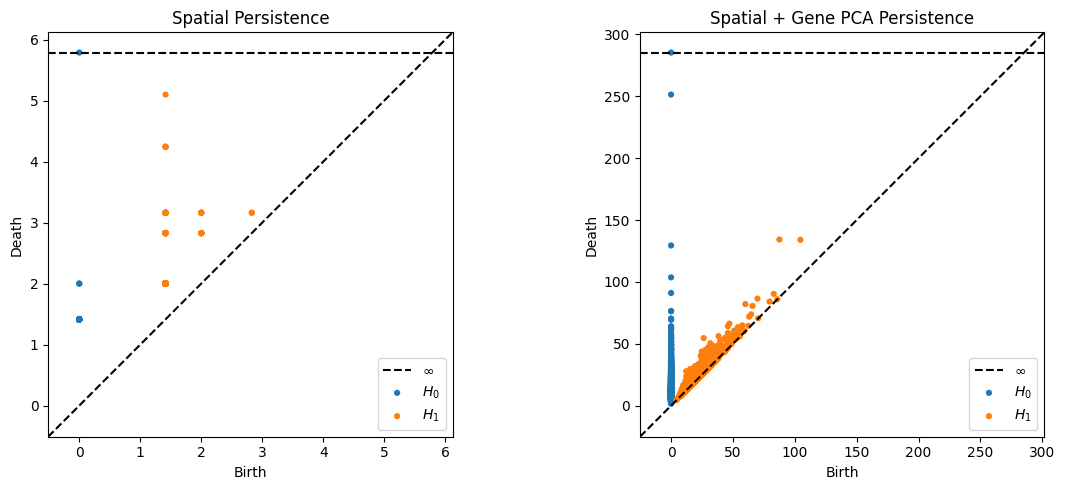

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from sklearn.decomposition import PCA

points = xy_coords_array
gene_expr = top_variance_genes_array

spatial_coords = points

# print types
print("Points type:", type(points))
print("Gene expression type:", type(gene_expr))


# spatial_coords = np.concatenate(points, axis=0)
# gene_expr = np.concatenate(gene_expr, axis=0)

# Step 2: PCA on gene expression
pca = PCA(n_components=2)
gene_pca = pca.fit_transform(gene_expr)

# Step 3: Combine spatial and gene PCA data
combined_data = np.hstack([spatial_coords, gene_pca])

# Step 4: Persistent homology
result_spatial = ripser(spatial_coords)
result_combined = ripser(combined_data)

# Step 5: Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Spatial Persistence")
plot_diagrams(result_spatial["dgms"], show=False, ax=axs[0])

axs[1].set_title("Spatial + Gene PCA Persistence")
plot_diagrams(result_combined["dgms"], show=False, ax=axs[1])

plt.tight_layout()
plt.show()

In [50]:
gene_expr = top_variance_genes_array
gene_expr = np.concatenate(gene_expr, axis=0)
gene_expr

array([ 7.,  4.,  1., ..., 16., 17.,  6.], dtype=float32)